# **Introducion**

Good morning everyone,

I am an Italian citizen, and I am using this notebook to apply for a postgraduate degree in Data Analysis for Data Science and Business Intelligence.

As I am applying to the University of Turin in Italy, this notebook will focus on comparing Italian universities to the rest of the world.

Best regards.

# **Importing required libraries**

In [214]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

# **Data ingestion**

## Importing dataset

In [215]:
# Fonte. https://www.timeshighereducation.com/world-university-rankings/2024/world-ranking

df = pd.read_csv('THE World University Rankings 2016-2024.csv', encoding='cp1252')
df

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
0,1.0,California Institute of Technology,United States,2243,6.9,26%,33 : 67,95.2000,95.6,97.6,99.8,97.8,64.0,2016
1,2.0,University of Oxford,United Kingdom,19920,11.6,34%,46:54:00,94.2000,86.5,98.9,98.8,73.1,94.4,2016
2,3.0,Stanford University,United States,15596,7.8,22%,42:58:00,93.9000,92.5,96.2,99.9,63.3,76.3,2016
3,4.0,University of Cambridge,United Kingdom,18810,11.8,34%,46:54:00,92.8000,88.2,96.7,97.0,55.0,91.5,2016
4,5.0,Massachusetts Institute of Technology,United States,11074,9.0,33%,37 : 63,92.0000,89.4,88.6,99.7,95.4,84.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12425,1900.0,Penza State University,Russian Federation,17934,17.2,12%,56:44:00,12.1935,14.3,8.7,7.8,16.3,32.8,2024
12426,1901.0,Universidad Peruana de Ciencias Aplicadas (UPC),Peru,56595,21.1,1%,50:50:00,12.1470,13.5,8.7,10.1,15.6,26.5,2024
12427,1902.0,Universidade Federal Rural do Semi-Arido,Brazil,8687,12.4,0%,49:51:00,11.9910,19.1,9.0,5.7,16.6,18.3,2024
12428,1903.0,State University of Bahia,Brazil,25067,11.9,0%,66:34:00,11.5655,19.3,8.6,4.1,16.2,20.0,2024


## Overall information

In [216]:
df.dtypes

Rank                       float64
Name                        object
Country                     object
Student Population           int64
Students to Staff Ratio    float64
International Students      object
Female to Male Ratio        object
Overall Score              float64
Teaching                   float64
Research Environment       float64
Research Quality           float64
Industry Impact            float64
International Outlook      float64
Year                         int64
dtype: object

In [217]:
df.isna().sum()

Rank                         0
Name                         0
Country                      0
Student Population           0
Students to Staff Ratio      0
International Students       0
Female to Male Ratio       591
Overall Score                0
Teaching                     0
Research Environment         0
Research Quality             0
Industry Impact              0
International Outlook        0
Year                         0
dtype: int64

Checking if any Italian university has a missing entry in the 'Female to Male Ratio.

In [218]:
df.loc[(df['Female to Male Ratio'].isna()) & (df['Country'] == 'Italy')]

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
330,331.0,University of Naples Federico II,Italy,83653,64.2,1%,NaN,39.0075,24.7,14.8,81.3,47.4,21.1,2016
500,501.0,Università Cattolica del Sacro Cuore,Italy,30304,18.9,10%,NaN,29.4825,18.6,11.3,55.4,38.7,39.0,2016
1381,582.0,Università Cattolica del Sacro Cuore,Italy,30263,18.9,8%,NaN,28.5400,18.0,7.6,56.4,40.3,39.1,2017
2000,220.0,University of Bologna,Italy,62296,22.2,10%,NaN,50.6425,43.6,30.1,80.0,39.1,47.4,2018
2209,429.0,University of Turin,Italy,59116,31.4,7%,NaN,38.3700,20.6,20.3,72.3,45.3,43.7,2018
2358,578.0,Università Cattolica del Sacro Cuore,Italy,32844,11.4,8%,NaN,31.7075,19.7,11.6,62.5,35.3,35.8,2018
9028,302.0,Politecnico di Milano,Italy,37532,25.4,18%,NaN,48.7250,39.0,45.3,56.4,74.6,62.0,2023


# **Data Wrangling**

## Pipeline

As the dataframe contains plenty of information, and some of it is based on the relative position of the row, such as rank, creating a pipeline allows us to apply all the necessary steps to a specific part of the dataframe (such as only the 2024 entry) in an easy and convenient way by passing the desired dataframe as the argument of the function.

In [219]:
def data_wrangling_pipeline(df):
    df = rank_wrangling(df)
    df = international_students_wrangling(df)
    df = female_to_male_wrangling(df)
    
    return df

def rank_wrangling(df):
    """
    Check if the dataframe is sort by Overall Score in descending order, if not it get sorted accordingly.
    Assign to each row a rank based on their position
    """

    # Check if the df is ordered by 'Overall Score', if not it get sorted
    if not df['Overall Score'].is_monotonic_decreasing:
        df.sort_values(by='Overall Score', ascending=False, inplace=True)
    # This line serve two purposes:
    ## 1. Convert rank from float to int
    ## 2. Assign the correct rank based on the position
    df['Rank'] = np.arange(1, df.shape[0]+1, dtype='int')
    
    # Return the df
    return df

def international_students_wrangling(df):
    """
    Convert international student into a percentage espressed as a float between 0 and 1
    """

    # Remove '%' symbol
    df['International Students'] = df['International Students'].apply(lambda x : x.replace('%',  ''))
    # If the resulting string is '', it is replaced with np.NaN 
    df['International Students'] = df['International Students'].replace('', np.NaN)
    # Fill np.NaN: first, by using the last valid entry and then, the next valid entry
    df['International Students'] = df.groupby('Name')['International Students'].ffill().bfill()
    # Value is converted to a float
    df['International Students'] = df['International Students'].astype('float64').apply(lambda x : x / 100)
    
    # Return the df
    return df

def female_to_male_wrangling(df):
    """
    Convert female_to_male_ratio into a percentage express as a float between 0 and 1
    """

    def female_to_male_convert_dtype(x):
        """
        Parse the two forms in which the ratio is expressed in the dataframe:
            1. If x is a float between 0 and 1 -> Return as it is.
            2. If x is a string (in the format female:male:others) -> Select the number of females and divide it by 100.
        """
        try:
            return float(x)
        except ValueError:
            float(x[:x.find(':')]) / 100

    # Apply the nested function to each entry in the column
    df['Female to Male Ratio'] = df['Female to Male Ratio'].apply(female_to_male_convert_dtype)
    # Fill np.NaN: first, by using the last valid entry and then, the next valid entry
    df['Female to Male Ratio'] = df['Female to Male Ratio'].ffill().bfill()
    
    # return the df
    return df

In [220]:
# Analysis only date reagarding 2024
df_2024 = data_wrangling_pipeline(df.loc[df['Year'] == 2024].copy())

# **Data analysis**

Just to make sure everything work, printing out dtypes in naumer on NaN value in each column

In [221]:
df_2024.dtypes

Rank                         int64
Name                        object
Country                     object
Student Population           int64
Students to Staff Ratio    float64
International Students     float64
Female to Male Ratio       float64
Overall Score              float64
Teaching                   float64
Research Environment       float64
Research Quality           float64
Industry Impact            float64
International Outlook      float64
Year                         int64
dtype: object

In [222]:
df_2024.isna().sum()

Rank                       0
Name                       0
Country                    0
Student Population         0
Students to Staff Ratio    0
International Students     0
Female to Male Ratio       0
Overall Score              0
Teaching                   0
Research Environment       0
Research Quality           0
Industry Impact            0
International Outlook      0
Year                       0
dtype: int64

## Analysis of Italian University

### Number of University per Country

<Axes: xlabel='Country'>

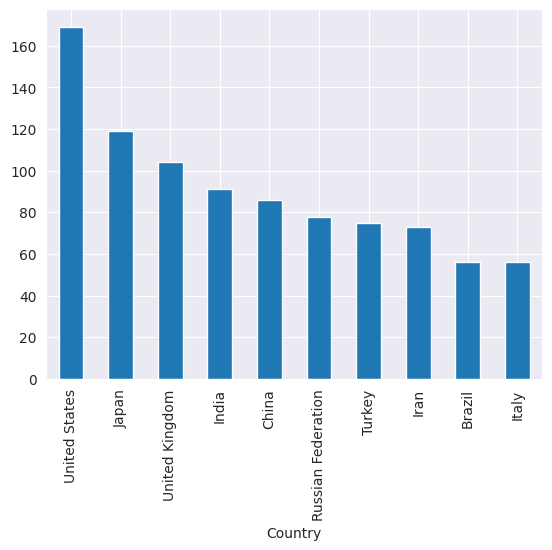

In [223]:
university_per_country = df_2024['Country'].value_counts().nlargest(10)

university_per_country.plot.bar()

### Ranking of Italian University

In [224]:

print(f"Num of italian University: {df_2024.loc[df_2024['Country'] == 'Italy'].shape[0]}")
df_2024.loc[df_2024['Country'] == 'Italy']


Num of italian University: 56


,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year
10681,156,University of Bologna,Italy,74105,24.7,0.11,0.929861,61.7675,53.0,44.6,86.5,79.4,54.3,2024
10696,171,Scuola Normale Superiore di Pisa,Italy,614,7.4,0.11,0.929861,60.7970,60.1,42.6,82.9,34.9,59.3,2024
10706,181,Sapienza University of Rome,Italy,60522,22.2,0.09,0.929861,60.0050,53.5,48.1,77.9,85.4,46.5,2024
10732,207,Sant’Anna School of Advanced Studies – Pisa,Italy,718,7.4,0.20,0.725000,58.3800,50.4,39.0,80.1,90.3,60.8,2024
10751,226,Politecnico di Milano,Italy,38978,25.7,0.19,0.397222,57.3480,42.9,49.7,71.9,95.3,65.3,2024
10753,228,University of Padua,Italy,44401,26.5,0.07,0.397222,57.0610,46.1,38.5,84.1,77.1,53.1,2024
10799,274,Humanitas University,Italy,1988,17.9,0.18,0.397222,54.5640,32.3,27.9,98.0,62.8,67.1,2024
10813,288,Vita-Salute San Raffaele University,Italy,4087,13.9,0.05,0.397222,53.9050,34.6,26.9,98.3,66.8,49.8,2024
10835,310,Università Cattolica del Sacro Cuore,Italy,28830,39.1,0.07,0.397222,52.8065,35.2,30.0,89.4,74.5,52.3,2024
10846,321,University of Pavia,Italy,17701,31.5,0.09,0.397222,52.2650,37.6,32.3,82.7,80.4,50.4,2024




**Best ranking Italian University**

University of Bologna - 156 rank - Overall Score of 61.7675


**University of Turin and direct competitor**
* University of Turin - 449 rank -  47.2525
* Polytechnic University of Turin - 455 rank - 46.9915
* University of Eastern Piedmon - 778 rank -	37.4505	

**Color coding this University**

In [225]:
color_per_university = {
    'University of Bologna': 'red',
    'University of Turin': 'yellow',
    'Polytechnic University of Turin': 'green',
    'Amedeo Avogadro University of Eastern Piedmont': 'pink'
}

df_2024['Color'] = df['Name'].map(color_per_university)
df_2024['Color'] = df_2024['Color'].fillna('blue')

As some graphs get overly crowded, I am creating a DataFrame with only Italian universities

In [226]:
df_italy = df_2024.loc[df_2024['Country'] == 'Italy']

## Rank

(0.0, 100.0)

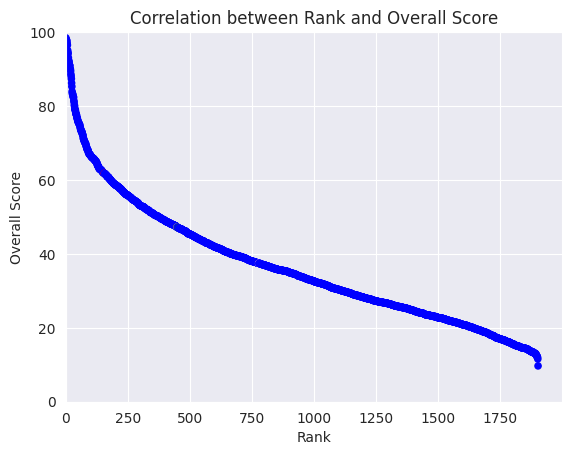

In [227]:
df_2024.plot.scatter(
    x='Rank',
    y='Overall Score',
    c = 'Color'
)

plt.title('Correlation between Rank and Overall Score')
plt.xlim(0)
plt.ylim([0, 100])

(0.0, 100.0)

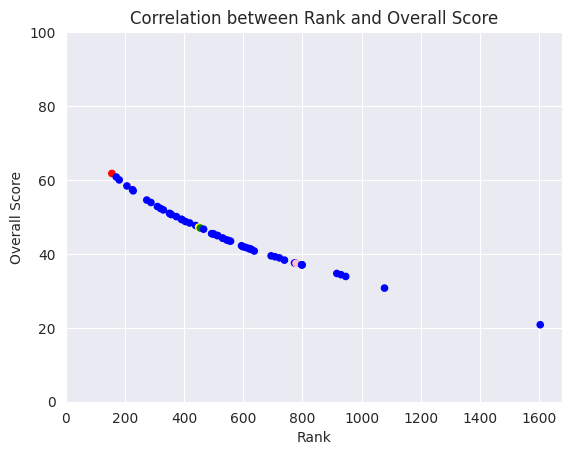

In [228]:
df_italy.plot.scatter(
    x='Rank',
    y='Overall Score',
    c = 'Color'
)

plt.title('Correlation between Rank and Overall Score')
plt.xlim(0)
plt.ylim([0, 100])

## Student Population

In [229]:
def add_vertical_line_to_graph(university_name, parameter):
    plt.axvline(
        df_2024.loc[df_2024['Name'] == university_name][parameter].values,
        c = color_per_university[university_name]
    )

(0.0, 506666.8)

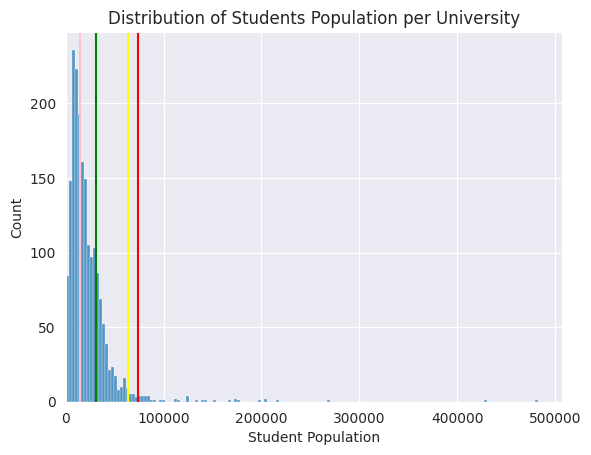

In [230]:
sns.histplot(
    x='Student Population',
    data=df_2024
)

for university in color_per_university.keys():
    add_vertical_line_to_graph(university, 'Student Population')

plt.title('Distribution of Students Population per University')
plt.xlim(0)

## International Students
**Plotting the graph**

(0.0, 1.0)

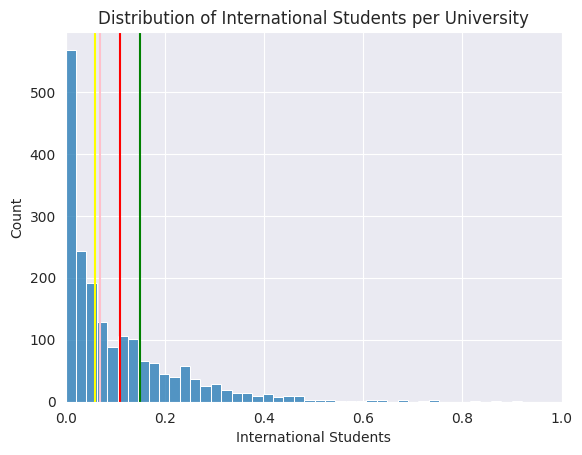

In [231]:
sns.histplot(
    x = 'International Students',
    data = df_2024
)

for university in color_per_university.keys():
    add_vertical_line_to_graph(university, 'International Students')

plt.title('Distribution of International Students per University')
plt.xlim([0, 1])

## Female To Male Ratio

(0.0, 1.0)

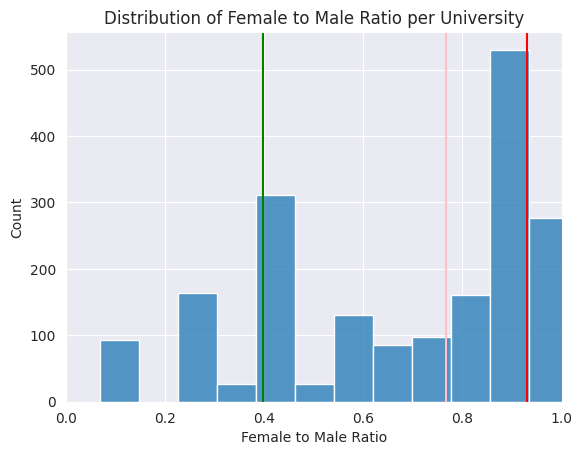

In [232]:
sns.histplot(
    x = 'Female to Male Ratio',
    data = df_2024
)

for university in color_per_university.keys():
    add_vertical_line_to_graph(university, 'Female to Male Ratio')

plt.title('Distribution of Female to Male Ratio per University')
plt.xlim([0, 1])

In [233]:
df_2024.loc[df_2024['Name'].isin(color_per_university.keys())]

,Rank,Name,Country,Student Population,Students to Staff Ratio,International Students,Female to Male Ratio,Overall Score,Teaching,Research Environment,Research Quality,Industry Impact,International Outlook,Year,Color
10681,156,University of Bologna,Italy,74105,24.7,0.11,0.929861,61.7675,53.0,44.6,86.5,79.4,54.3,2024,red
10974,449,University of Turin,Italy,63232,29.5,0.06,0.397222,47.2525,23.0,30.1,84.5,74.4,45.5,2024,yellow
10980,455,Polytechnic University of Turin,Italy,30497,31.9,0.15,0.397222,46.9915,29.7,30.2,73.5,85.8,53.2,2024,green
11303,778,Amedeo Avogadro University of Eastern Piedmont,Italy,14981,40.8,0.07,0.765972,37.4505,12.7,23.5,71.3,47.1,48.2,2024,pink


## International Outlook

(0.0, 100.0)

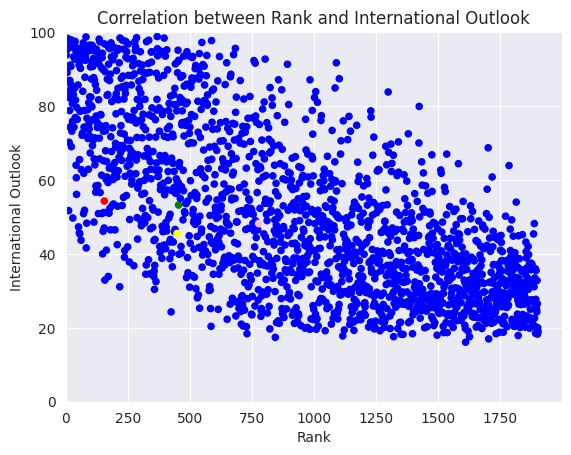

In [234]:
df_2024.plot.scatter(
    x='Rank',
    y='International Outlook',
    c = 'Color'
)

plt.title('Correlation between Rank and International Outlook')
plt.xlim(0)
plt.ylim([0, 100])

(0.0, 100.0)

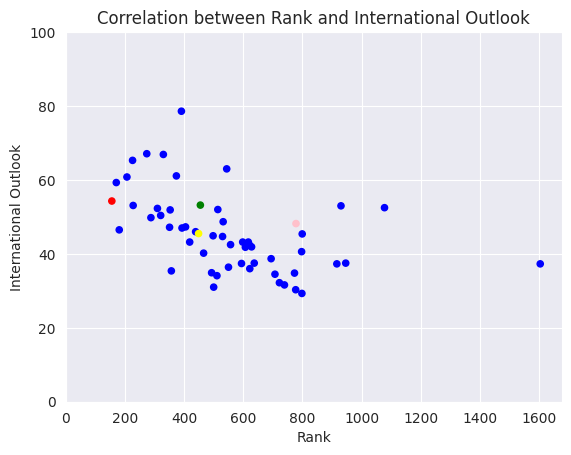

In [235]:
df_italy.plot.scatter(
    x='Rank',
    y='International Outlook',
    c = 'Color'
)

plt.title('Correlation between Rank and International Outlook')
plt.xlim(0)
plt.ylim([0, 100])

## Grazie per l'attezione